# Merced land use classification

Some default settings.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state


## Data augmentation 

(If you ran this already once and you have your data already, you can skip this section)

First, we convert all .tif images to .png for convenience (ImageDatGenerator only accepts .png or .jpeg)

In [2]:
import os, glob, subprocess
from PIL import Image

#Convert all input images from .tif to .png
thispath = os.getcwd()
cmd=str( 'mkdir %s/InputFiles'%thispath )
os.system(cmd)
cats = os.listdir( '%s/UCMerced_LandUse/Images/'%thispath )
for cat in cats:
    newpath=str( '%s/InputFiles/%s'%(thispath,cat) )
    cmd=str( 'mkdir -p %s'%(newpath) )
    os.system(cmd)
    fullpath = str( "%s/UCMerced_LandUse/Images/%s"%(thispath,cat) ) 
    images = glob.glob("%s/*.tif"%fullpath)
    for infile in images:
        f, e = os.path.splitext(infile)
        outfile = newpath + "/" + f.split("/")[-1] + ".png"
        if infile != outfile:
            im = Image.open(infile)
            im.save(outfile, format = "png")

Now generate 10 new images for every image in the dataset ("data augmentation")

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=180,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            channel_shift_range=0.1,
            fill_mode='nearest')

#Make 10 "random" copies for each image of each category.
for cat in cats:
    directory = str( '%s/InputFiles/%s'%(thispath,cat) )
    print('Transforming files in %s'%directory)
    files=os.listdir( directory )
    filenum=0
    for file in files:
        img = load_img( directory + '/' + file )
        x = img_to_array(img) 
        x = x.reshape((1,) + x.shape)  
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=directory, save_prefix=cat+'_new_'+str(filenum), save_format='png'):
            i += 1
            if i >= 10:
                break
        filenum += 1

Using Theano backend.


Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/InputFiles/agricultural
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/InputFiles/airplane
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/InputFiles/baseballdiamond
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/InputFiles/beach
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/InputFiles/buildings
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/InputFiles/chaparral
Transforming files in /Users/Vincenzo/Desktop/EPFL/AdvancedComputingTechniques/Exercises/advanced-comp-2017/FinalProject/InputFiles/denseresiden

Example of how images are transformed with data augmentation (left: original image, from 2nd to 5th: transformed images)

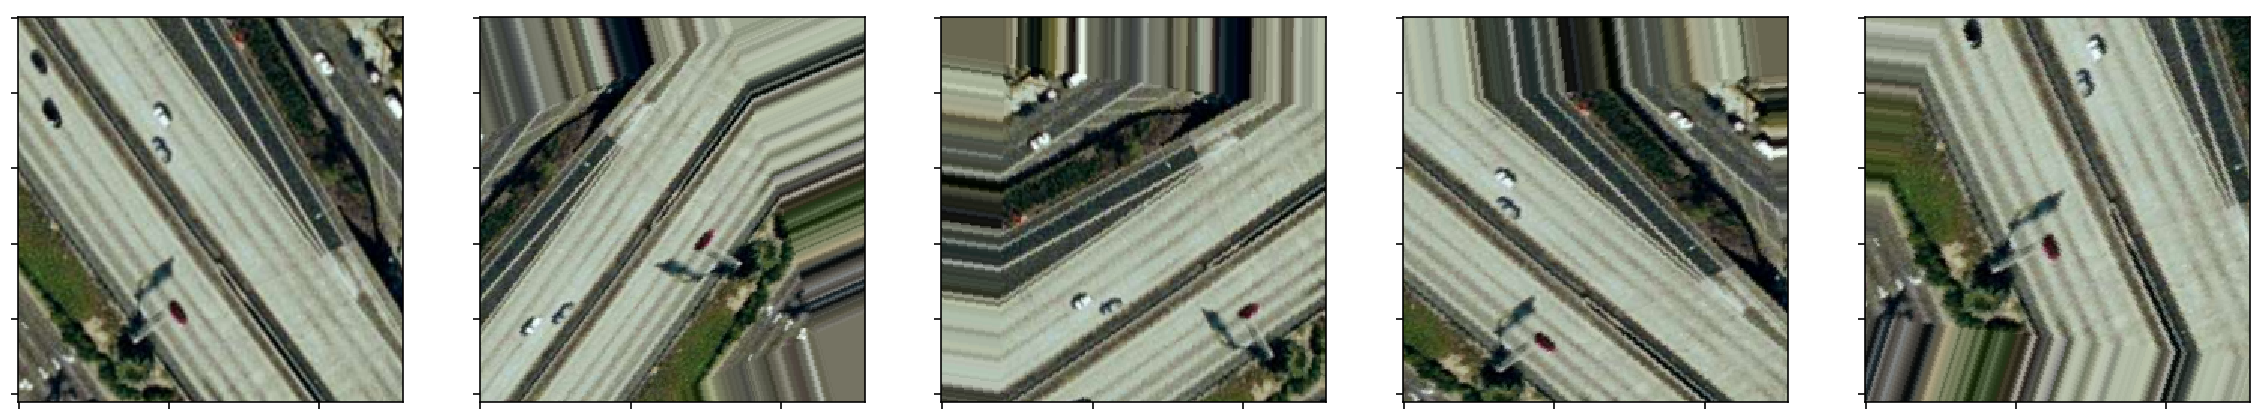

In [20]:
from IPython.display import Image, display, FileLinks
import matplotlib.image as mpimg
images = ['freeway00','freeway_new_0_0_666','freeway_new_0_0_1365','freeway_new_0_0_1877','freeway_new_0_0_4361']
fig, axs = plt.subplots(1, len(images), figsize=(20, 20))
imgs = []
for i in range(len(images)):
    ax = axs[i]
    imgs.append(mpimg.imread(thispath+"/data_augmentation_examples/"+images[i]+".png"))
    ax.imshow(imgs[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

#for img in images:
#    display(Image(filename=thispath+"/data_augmentation_examples/"+img+".png", width=200, height=200))

## Data visualisation and dimensionality reduction 

First, let's import data as proper numpy arrays.

In [38]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils
import os, glob

thispath = os.getcwd()
cats = os.listdir( '%s/InputFiles/'%thispath )
X_temp = []
y_temp = []
icat=0
for cat in cats:
    directory=str( "%s/InputFiles/%s"%(thispath,cat) ) 
    files=os.listdir( directory )
    ifile=0
    for file in files:
        img = load_img( directory + '/' + file )
        x = img_to_array(img) 
        X_temp.append(x)
        y_temp.append(icat)
        if ifile==3:
            break
        ifile += 1
    icat += 1
y = np.array(y_temp)
shape = list(X_temp[0].shape)
shape[:0] = [len(X_temp)]
y = np_utils.to_categorical(y, len(cats))
X = np.concatenate(X_temp).reshape(shape)

In [39]:
np.shape(X)

(84, 256, 256, 3)

In [41]:
X

array([[[[  44.,   41.,   45.],
         [  53.,   50.,   56.],
         [  47.,   44.,   50.],
         ..., 
         [ 125.,  126.,  122.],
         [ 137.,  137.,  130.],
         [ 119.,  119.,  111.]],

        [[  41.,   38.,   42.],
         [  46.,   43.,   46.],
         [  44.,   41.,   45.],
         ..., 
         [  83.,   83.,   81.],
         [ 124.,  124.,  118.],
         [ 135.,  131.,  126.]],

        [[  42.,   39.,   43.],
         [  44.,   41.,   44.],
         [  43.,   40.,   44.],
         ..., 
         [  90.,   95.,   91.],
         [  99.,  103.,   98.],
         [ 101.,   99.,   97.]],

        ..., 
        [[ 175.,  173.,  175.],
         [ 190.,  191.,  189.],
         [ 223.,  223.,  221.],
         ..., 
         [ 144.,  144.,  136.],
         [ 135.,  135.,  126.],
         [ 124.,  123.,  118.]],

        [[ 120.,  113.,  120.],
         [ 151.,  147.,  150.],
         [ 168.,  166.,  165.],
         ..., 
         [ 123.,  121.,  117.],
       